In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import graphviz
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
Arbnb = pd.read_csv('Airbnb_Open_Data.csv')
Arbnb

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [ ]:
#EDA

In [4]:
Arbnb.fillna(0, inplace=True)
Arbnb

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,0,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,0,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",0
3,1002755,0,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,0,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,0,0.00,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,0,0.00,5.0,1.0,342.0,0,0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,0,0


In [4]:
Arbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,0,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,0,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",0
3,1002755,0,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,0,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",0


In [ ]:
Arbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102599 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102599 non-null  object 
 4   host name                       102599 non-null  object 
 5   neighbourhood group             102599 non-null  object 
 6   neighbourhood                   102599 non-null  object 
 7   lat                             102599 non-null  float64
 8   long                            102599 non-null  float64
 9   country                         102599 non-null  object 
 10  country code                    102599 non-null  object 
 11  instant_bookable                102599 non-null  object 
 12  cancellation_pol

In [ ]:
#reemplazo de nulos y correlaciones

In [ ]:
Arbnb.corr()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
id,1.000000,-0.000830,0.013499,-0.011772,0.048566,0.006304,-0.041409,0.045889,0.038043,0.023944,-0.135696
host id,-0.000830,1.000000,0.004291,-0.004908,0.001276,-0.002226,-0.004499,-0.002829,0.003745,0.001647,-0.002117
lat,0.013499,0.004291,1.000000,-0.984461,0.023504,0.002127,-0.005276,-0.000044,0.004443,0.006805,-0.001897
long,-0.011772,-0.004908,-0.984461,1.000000,-0.023219,-0.002834,0.006627,0.005240,-0.004075,-0.009725,0.005558
Construction year,0.048566,0.001276,0.023504,-0.023219,1.000000,0.000158,-0.030091,0.004663,0.012566,0.006220,-0.005354
minimum nights,0.006304,-0.002226,0.002127,-0.002834,0.000158,1.000000,-0.049915,-0.092127,-0.002115,0.084608,0.057903
number of reviews,-0.041409,-0.004499,-0.005276,0.006627,-0.030091,-0.049915,1.000000,0.617857,-0.021413,-0.080657,0.097681
reviews per month,0.045889,-0.002829,-0.000044,0.005240,0.004663,-0.092127,0.617857,1.000000,0.031001,-0.039924,0.073163
review rate number,0.038043,0.003745,0.004443,-0.004075,0.012566,-0.002115,-0.021413,0.031001,1.000000,0.024666,-0.008357
calculated host listings count,0.023944,0.001647,0.006805,-0.009725,0.006220,0.084608,-0.080657,-0.039924,0.024666,1.000000,0.158912


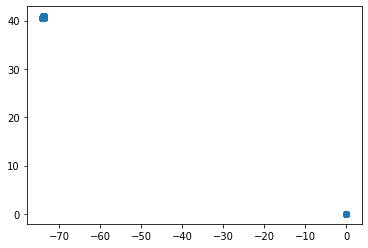

In [ ]:
plt.scatter(Arbnb[['long']], Arbnb[['lat']])

In [ ]:
Arbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   host id                         102599 non-null  int64  
 2   lat                             102599 non-null  float64
 3   long                            102599 non-null  float64
 4   Construction year               102599 non-null  float64
 5   minimum nights                  102599 non-null  float64
 6   number of reviews               102599 non-null  float64
 7   reviews per month               102599 non-null  float64
 8   review rate number              102599 non-null  float64
 9   calculated host listings count  102599 non-null  float64
 10  availability 365                102599 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 8.6 MB


In [5]:
Arbnb.drop(['host name','neighbourhood','neighbourhood group','price','NAME','host_identity_verified','country','country code',
            'instant_bookable','cancellation_policy','room type','service fee','last review','license','house_rules'], axis = 'columns', inplace=True)

In [6]:
Arbnb.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
Arbnb.fillna(999, inplace=True)

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

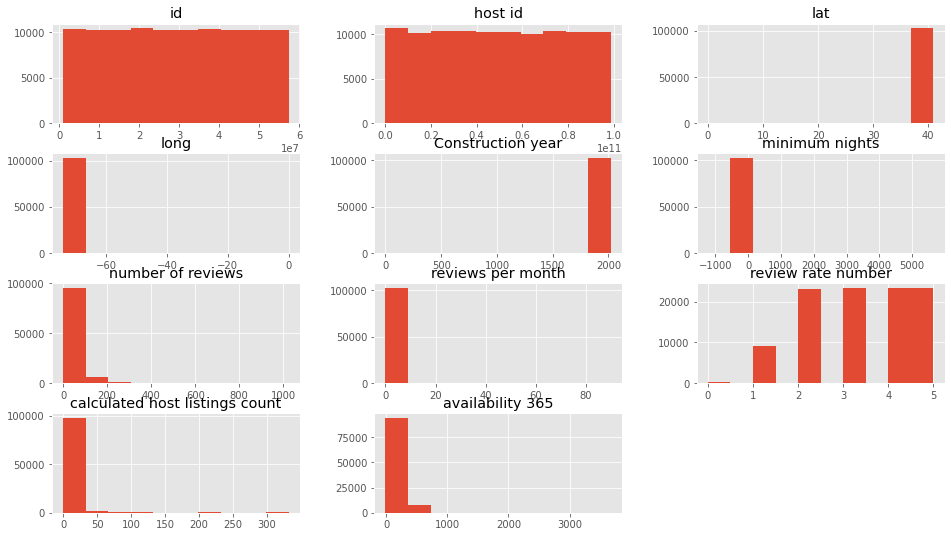

In [ ]:
Arbnb.hist()
plt.show()

In [ ]:
print(Arbnb.groupby('number of reviews').size())

number of reviews
0.0       15917
1.0       10408
2.0        7175
3.0        5375
4.0        4151
          ...  
849.0         1
884.0         1
966.0         1
1010.0        1
1024.0        1
Length: 476, dtype: int64


In [ ]:
# Podemos observar que de acuerdo a los siguientes graficos , las ciudades mas elegidas mara rentas , temporales , son brooklyn y manhattan.
#con un promedio de 40 mil rentas mensuales , entre ellos extranjeros y nativos.
# los servicios mas elegidos por las personas son los cuartos privados para las personas que son nomadas digitales o pasajeros.
# Por otro lado , otro dato mas importante son los deptos o casas alquiladas por completo , en su mayoria a personas dispuestas a vacacionar o pasar tiempos completos

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


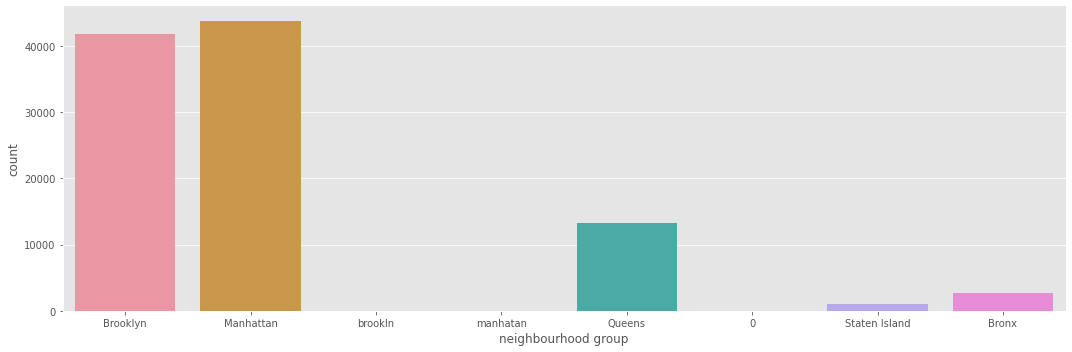

In [ ]:

sns.factorplot('neighbourhood group',data=Arbnb,kind="count", aspect=3)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


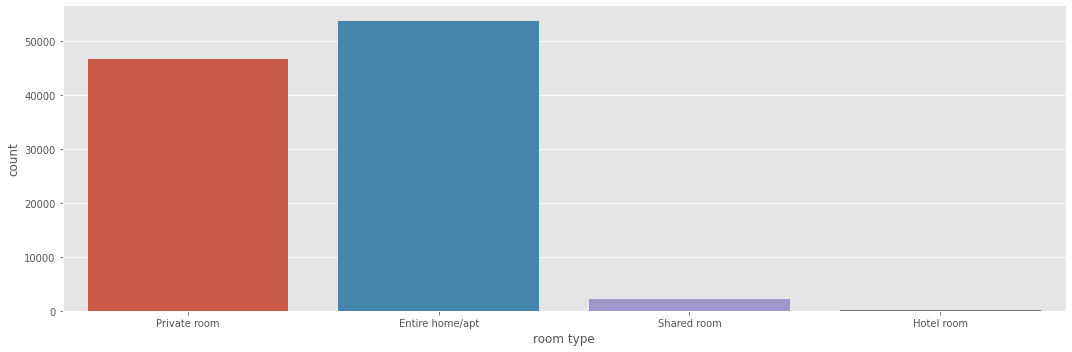

In [ ]:
sns.factorplot('room type',data=Arbnb,kind="count", aspect=3)

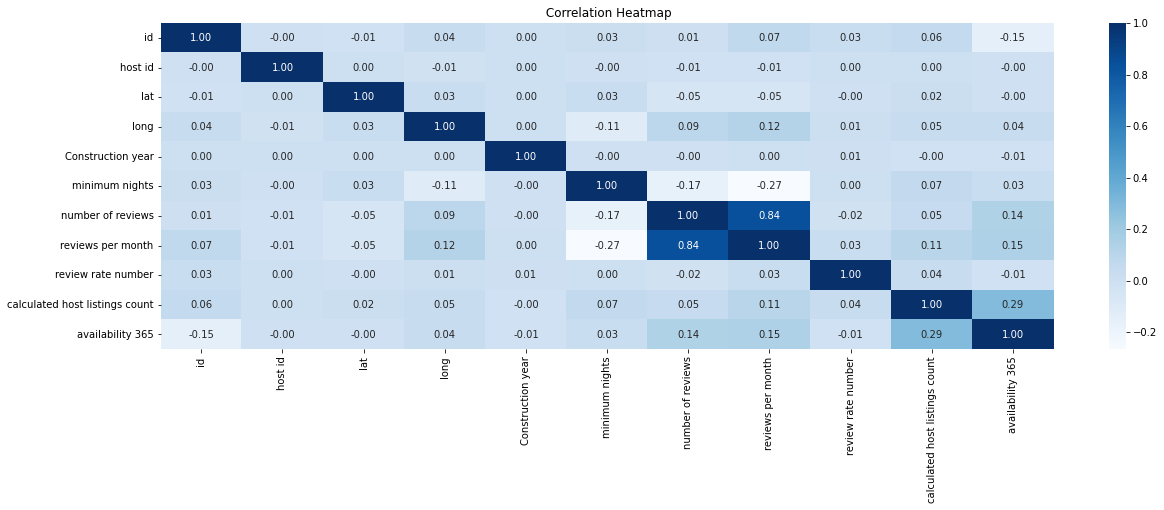

In [ ]:
corr = Arbnb.corr(method = 'spearman')
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title(' Correlation Heatmap')
plt.show()

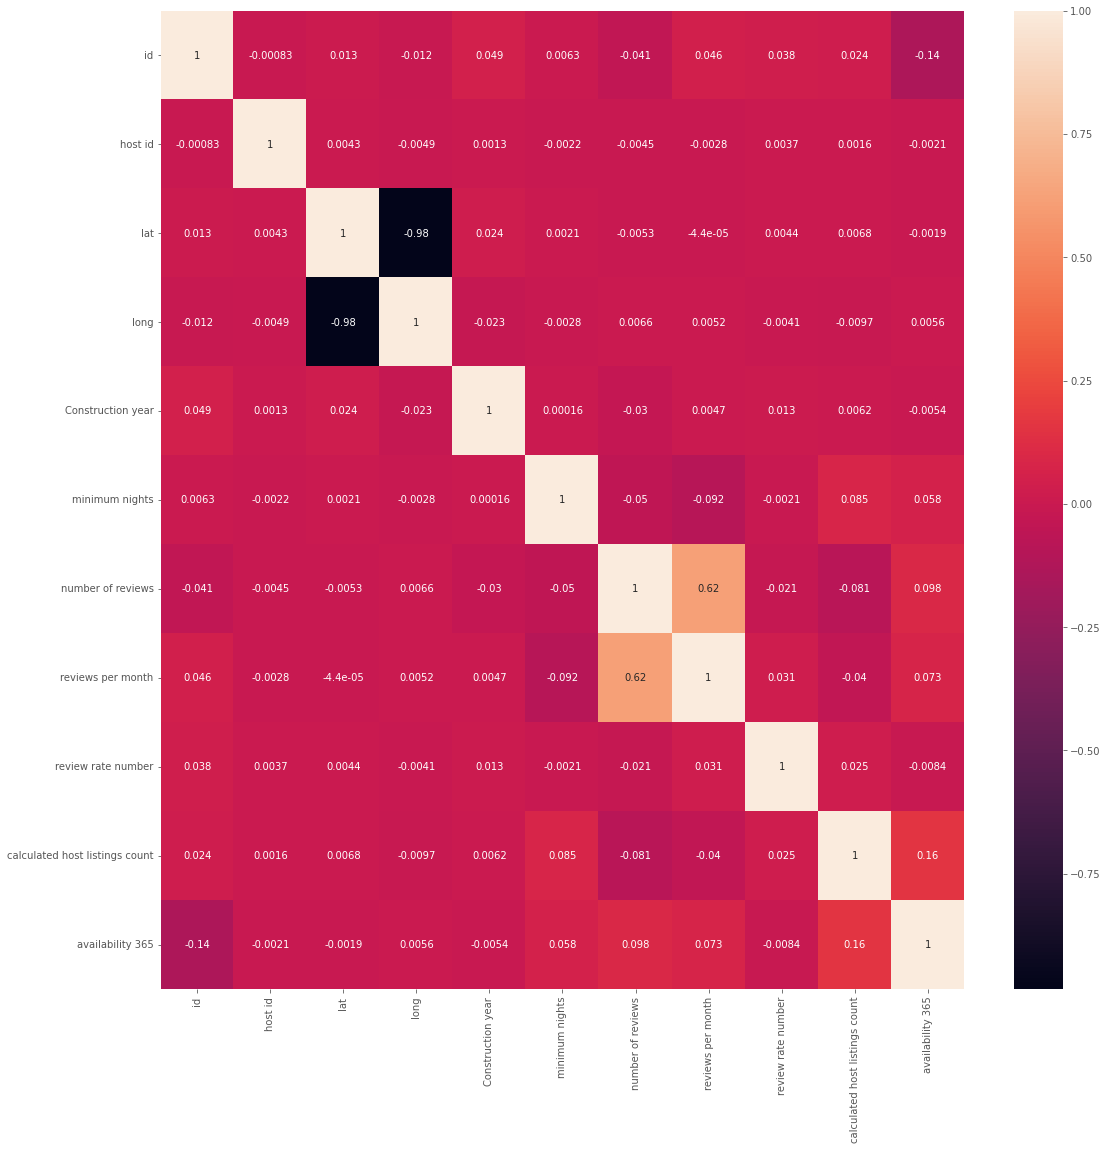

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(Arbnb.corr(), annot=True)

In [10]:
cols = list(Arbnb.columns)
print(cols)

['id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


In [ ]:
figure = plt.figure(figsize=(5,10))
sns.pairplot(Arbnb, hue='price', palette='GnBu')
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(20,25))
for i, col in zip(range(5), cols):
    sns.stripplot(ax=axes[i][0], x='price', y=col, data=Arbnb, palette='GnBu', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=Arbnb, kde=True, bins=10, palette='GnBu', hue='price', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='price', y=col, data=Arbnb, palette='GnBu', hue='price')
    axes[i][2].set_title(f'{col} Boxplot')

In [ ]:
# En este desarrollo veremos algunas de las modalidades que eligen los usuarios al momento de buscar su renta , que les queda mas comodo y por que metodo buscan


In [ ]:
import folium
mapa = folium.Map(location=[40.645244,-73.9449975])
mapa

In [11]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

In [ ]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [ ]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [ ]:
# number of tickets per month
X = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Y = [160, 180, 250, 140, 175, 150, 125, 156, 126, 104, 124, 140] # reservados
Z = [160, 180, 255, 140, 175, 160, 135, 202, 160, 139, 149, 177] # rentados

Text(-1.6, -83, 'Data source: ARBNB dashboard, as of 17/12/2020 | A detailed analysis on rent for personsand time to resolve issues was undertaken to inform this request and can be provided if needed.')

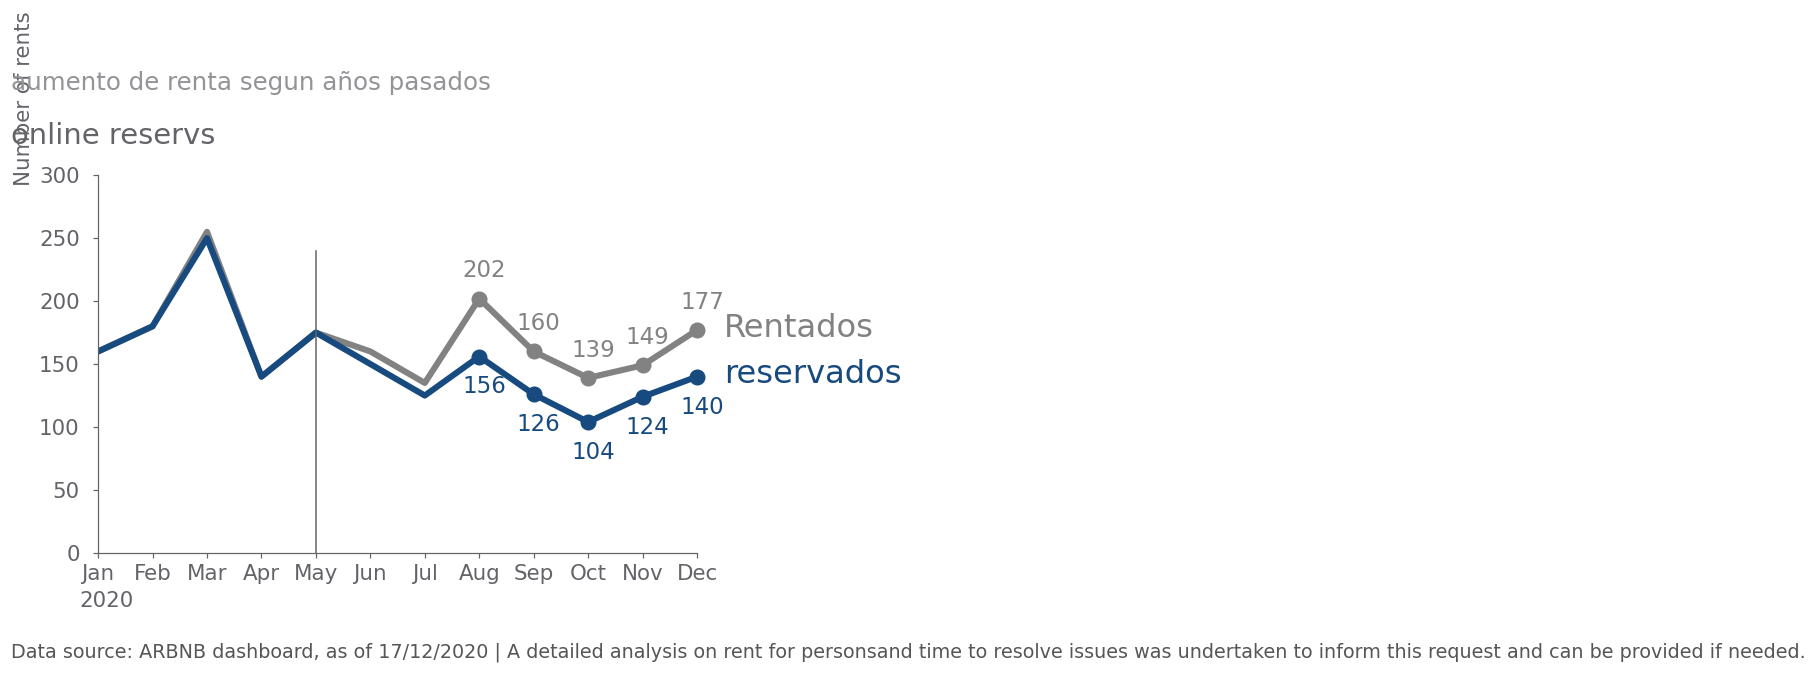

In [ ]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)

# draw received tickets line with markers
ax1.plot(range(12), Z, linewidth=4, color=GRAY6)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=GRAY6, clip_on=False)

# draw processed tickets line with markers
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=BLUE1, clip_on=False)

# annotate received
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                    # (x,y) point to annotate
                 xytext=(-11, 14),            # (x,y) to place the text at
                 textcoords='offset points',  # offset (in points)
                 color=GRAY6,
                 fontsize=15)

# annotate proccessed
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                   # (x,y) point to annotate
                 xytext=(-11, -24),          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points)
                 color=BLUE1,
                 fontsize=15)


# set the data limits for the y-axis and x-axis
ax1.set_xlim([0, 11])
ax1.set_ylim([0, 300])

# set properties for axes object
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X,
         yticks=list(range(0, 350, 50)))

# configure x, y tick labels appearance
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY4)

# shift y tick labels slightly left
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off')

# change ticks and spines colors
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY4)
ax1.spines['left'].set_color(GRAY4)

# remove chart border
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# add vertical reference line
plt.axvline(x=4, ymax=0.8, color='#636369', linewidth=1)

# label lines directly
ax1.text(11.5, 172, 'Rentados', fontsize='21', color=GRAY6)
ax1.text(11.5, 135, 'reservados', fontsize='21', color=BLUE1)


# title the axis
ax1.text(-1.6, 325, 'online reservs', fontsize=19, color=GRAY4)
ax1.text(-1.55, 295, 'Number of rents', fontsize=14, rotation='vertical',
         color=GRAY4)
ax1.text(-0.34, -43, '2020', fontsize=14, color=GRAY4)

# title the plot
ax1.text(-1.6, 397, '$\\bf{Grafica\ de\ real\ state\}$',
         fontsize=25, color=GRAY4)
ax1.text(-1.6, 368, 'aumento de renta segun años pasados',
         fontsize=16, color=GRAY7)

# add more informative text
ax1.text(4, 252,
         '',
         fontsize=14, color=GRAY5, linespacing=1.4)

# add footnote to the plot with data sources
ax1.text(-1.6, -83,
         'Data source: ARBNB dashboard, as of 17/12/2020 | A detailed analysis'
         ' on rent for persons'
         'and time to resolve issues was undertaken to inform this request'
         ' and can be provided if needed.',
         fontsize=12.5, color=GRAY3, linespacing=1.3)

In [ ]:
#El siguiente grafico representa el exti oque tiene Airbnb especialmente en estados unidos

In [ ]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [ ]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

Text(-0.15, 0.17, '')

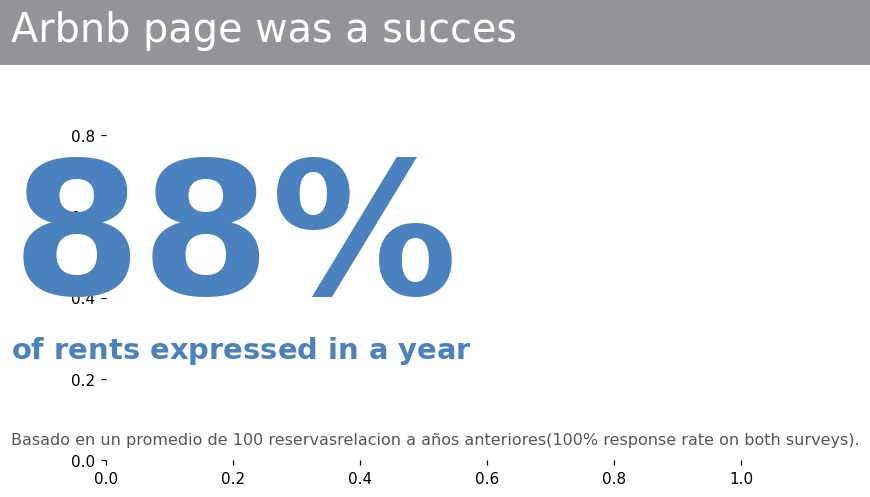

In [ ]:
# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')

# titile the plot
plt.text(-0.15, 1.03,
         'Arbnb page was a succes'+' '*27,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'})

# footnote with the data source
plt.text(-0.15, 0.04,
         'Basado en un promedio de 100 reservas'
         'relacion a años anteriores'
         '(100% response rate on both surveys).',
         fontsize=10.5,
         color=GRAY3)

# add note to the plot
plt.text(-0.15, 0.81,
         '',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.41,
         '$\\bf{88\%}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.25,
         # use mathtext \\bf for bold text
         '$\\bf{of\ rents\ expressed\ in \ a\ year}$',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.17,
                    '',
         fontsize=19,
         color=GRAY7)

In [ ]:
# Este grafico muestra que es mas efectivo a la hora de buscar un depto , casa , o habitacion (room service)

In [ ]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [ ]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [ ]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [ ]:
X = [ 'Real state', 'Desktop', 'Mobile','direct owner','social media']
Y = [75, 60, 65, 60, 80]
Z = [100, 90, 100, 80, 120]

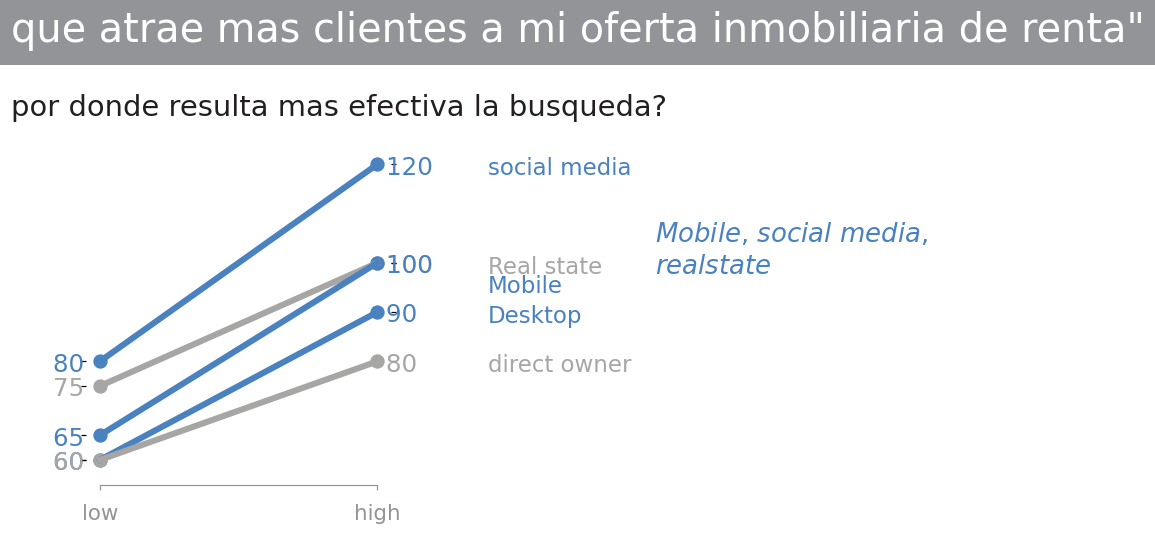

In [ ]:
# create new figure
fig, ax1 = plt.subplots(figsize=(7.6, 5.5),  # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# matplotlib doesn't have slopegraph drawing tool, so we use
# double axis approach
# create a twin Axes sharing the xaxis with the same limits for y-axis
ax2 = ax1.twinx()

ax2.set_ylim([55, 125])
ax1.set_ylim([55, 125])

# assign colors for responses
C = [GRAY8, BLUE2, BLUE2, GRAY8, BLUE2]
# draw slopegraph lines with circles at ends
for i in range(5):
    # draw circles
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    # add label
    plt.text(1.4,
             Z[i] + (-2, -6)[i == 2],
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

# change the appearance of ticks, tick labels, and gridlines
# (don't show left and right ticks)
ax1.tick_params(left='off')
ax2.tick_params(right='off')

# set properties for axes object
plt.setp(ax1,
         xticks=[0, 1],  # two x-ticks only 0 and 1
         xticklabels=['low', 'high'],  # with text labels
         yticks=Y,  # tick for all pre- responses %
         yticklabels=[str(v) + ' ' for v in Y])  # with n% labels

# set properties for secondary axes object
plt.setp(ax2,
         yticks=Z,  # tick for all post- responses %
         yticklabels=[str(v) + ' ' for v in Z])  # with n% labels

# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# configure both y's tick labels appearance
for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        # use trasformations to shift y tick labels
        # left y labels slightly right, and right labels slightly left
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

# titile the plot
plt.text(-0.32, 145,
         'que atrae mas clientes a mi oferta inmobiliaria de renta"',
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.32, 130, 'por donde resulta mas efectiva la busqueda?', fontsize=19, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.32, 40,
         '',
         fontsize=10.5,
         color=GRAY3)

# add after text note highlighthing some words with blue
rainbow_text(2, 98,
             ''
             ''
             '$\\it{Mobile}$, $\\it{social\ media},$\n'
             '$\\it{realstate}$|| ',
             [[GRAY7], [BLUE2], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

In [ ]:
# En la siguiente grafica se muestra el animo de los clientes al buscar su nuevo lugar , 
# representa la emocion o no sobre los clientes totales al encontrar su lugar 

In [ ]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [ ]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [ ]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [ ]:
# survey responses
X = ['mal', 'Nada', 'bien', 'un poco\interesado', 'genial']
Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

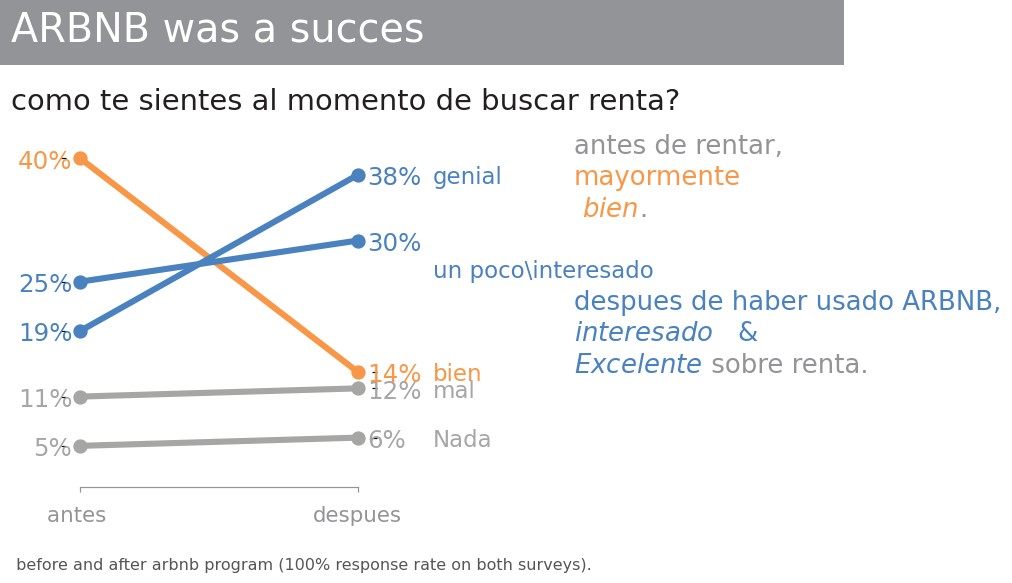

In [ ]:
# create new figure
fig, ax1 = plt.subplots(figsize=(7.6, 5.5),  # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# matplotlib doesn't have slopegraph drawing tool, so we use
# double axis approach
# create a twin Axes sharing the xaxis with the same limits for y-axis
ax2 = ax1.twinx()

ax2.set_ylim([0, 42])
ax1.set_ylim([0, 42])

# assign colors for responses
C = [GRAY8, GRAY8, ORANGE1, BLUE2, BLUE2]
# draw slopegraph lines with circles at ends
for i in range(5):
    # draw circles
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    # add label
    plt.text(1.27,
             Z[i] + (-1, -4.4)[i == 3],  # shift third label down more
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

# change the appearance of ticks, tick labels, and gridlines
# (don't show left and right ticks)
ax1.tick_params(left='off')
ax2.tick_params(right='off')

# set properties for axes object
plt.setp(ax1,
         xticks=[0, 1],  # two x-ticks only 0 and 1
         xticklabels=['antes ', 'despues'],  # with text labels
         yticks=Y,  # tick for all pre- responses %
         yticklabels=[str(v) + '%' for v in Y])  # with n% labels

# set properties for secondary axes object
plt.setp(ax2,
         yticks=Z,  # tick for all post- responses %
         yticklabels=[str(v) + '%' for v in Z])  # with n% labels

# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# configure both y's tick labels appearance
for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        # use trasformations to shift y tick labels
        # left y labels slightly right, and right labels slightly left
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

# titile the plot
plt.text(-0.25, 54.3,
         'ARBNB was a succes' + ' ' * 32,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.25, 46, 'como te sientes al momento de buscar renta?', fontsize=19, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.25, -10,
         ' '
         'before and after arbnb program '
         '(100% response rate on both surveys).',
         fontsize=10.5,
         color=GRAY3)

# add before text note highlighthing some words orange
rainbow_text(1.78, 33,
             'antes de rentar,\n'
             'mayormente\n'
             ' $\\mathit{bien}$||.',
             [[GRAY7], [ORANGE1], [ORANGE1, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

# add after text note highlighthing some words with blue
rainbow_text(1.78, 14,
             'despues de haber usado ARBNB,\n'
             ''
             '$\\it{interesado\ \ \ &}$\n'
             '$\\it{Excelente}$|| sobre renta.',
             [[GRAY7], [BLUE2], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

In [ ]:
from matplotlib.pyplot import Rectangle

X1 = ['quincena 1', 'quincena 2', 'quincena 3', 'quincena 4', 'quincena 5', 'quincena 6',
      'quincena 7', 'quincena 8', 'quincena 9', 'quincena10 ', 'quincena11 ', 'quincena12 ']
X2 = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
      'julio', 'agosto', 'septiembre', 'octubre ', 'noviembre ', 'diciembre ']
Y = [160, 180, 250, 140, 175, 150, 125, 156, 126, 104, 124, 140]
Z = [160, 180, 255, 140, 175, 160, 135, 202, 160, 139, 149, 177]

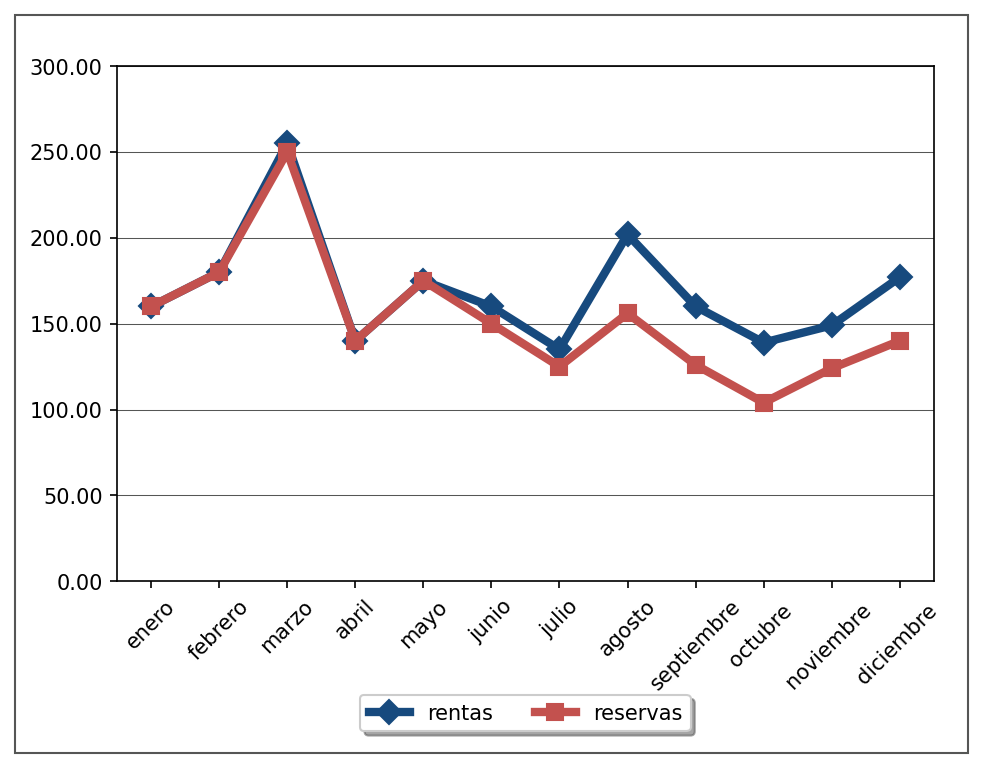

In [ ]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, 'D-', linewidth=4, color=BLUE1, markersize=8, label='rentas')
ax1.plot(range(12), Y, 's-', linewidth=4, color=RED1, markersize=8, label='reservas')
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X2,
         yticks=list(range(0, 350, 50)),
         yticklabels=['0.00', '50.00', '100.00', '150.00',
                      '200.00', '250.00', '300.00'])
plt.xticks(rotation=45)
plt.grid(color=GRAY3, linestyle='-', linewidth=0.5, axis='y')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
autoAxis = ax1.axis()
rec = Rectangle((autoAxis[0]-1.5,autoAxis[2]-100),(autoAxis[1]-autoAxis[0])+2,(autoAxis[3]-autoAxis[2])+130,fill=False,lw=1, color=GRAY3)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)
pass

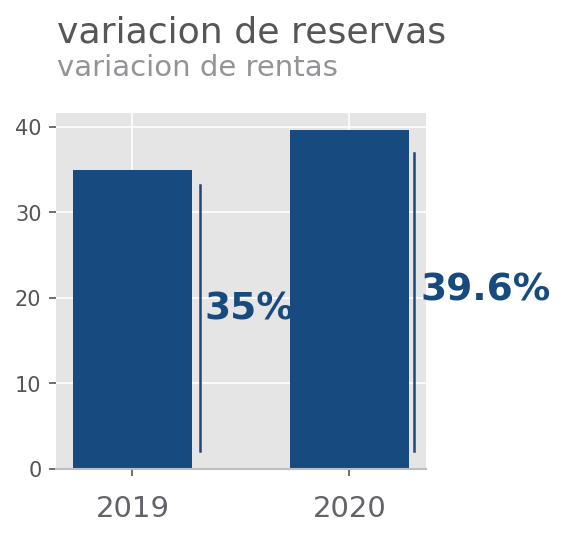

In [ ]:
now, after = 35, 39.6
fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150)
fig.subplots_adjust(left=0.154, right=0.77, top=0.89, bottom=0.1)
bars = plt.bar([0, 1], [now, after],
               color=BLUE1,
               linewidth=0.5,
               width=0.55)
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks([0, 1], ['2019', '2020'])
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
ax1.spines['bottom'].set_color(GRAY9)
# title the plot
ax1.text(-0.35, 50, 'variacion de reservas', color=GRAY3, 
         fontsize=17.4)
ax1.text(-0.35, 46, 'variacion de rentas', fontsize=14, color=GRAY7)
ax1.axvline(0.31, ymin=0.05, ymax=0.8, color=BLUE1, linewidth=1.2)
ax1.axvline(1.3, ymin=0.05, ymax=0.89, color=BLUE1, linewidth=1.2)
ax1.text(0.33, now/2, f'{now}%', fontweight='bold', fontsize=18, color=BLUE1)
ax1.text(1.33, after/2, f'{after}%', fontweight='bold', fontsize=18, color=BLUE1)
pass

In [ ]:
#hasta este momento utilizamos DBSCAN para nuestro dataset elegido , vemos que los datos que tenemos son pocos o no arrojan suficiente 
#informacion , por lo que decidimos hacer un algoritmo de regresion para este dataset 
#y agregamos mas informacion para nuestro algoritmo , por lo que procederemos a realizar las mismas traeas

In [12]:
from sklearn.cluster import KMeans

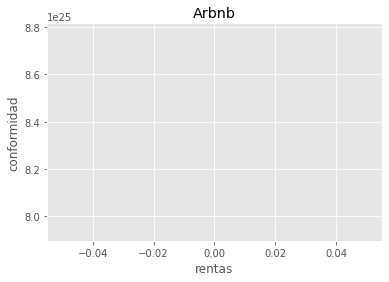

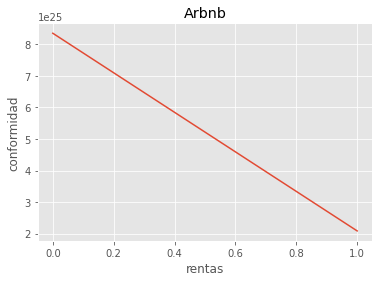

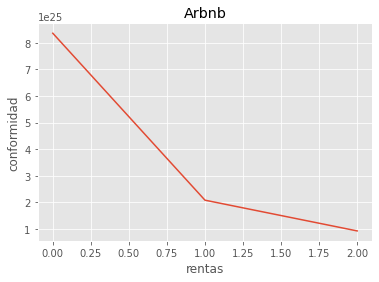

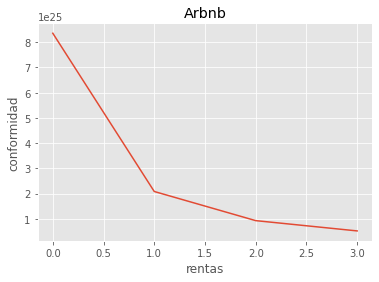

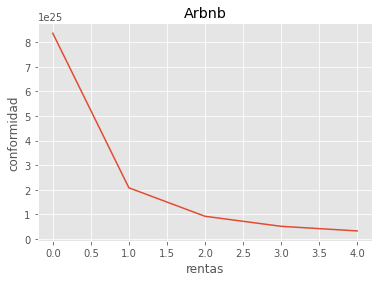

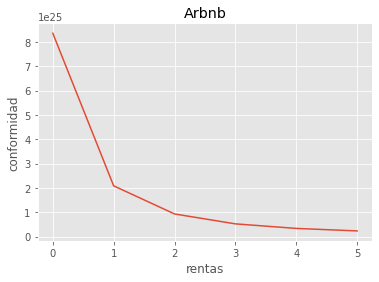

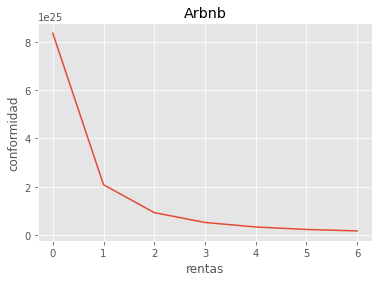

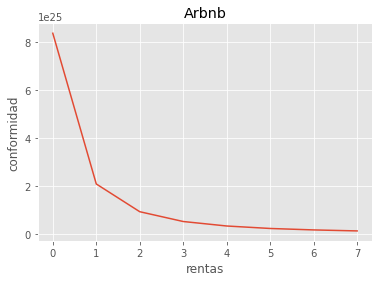

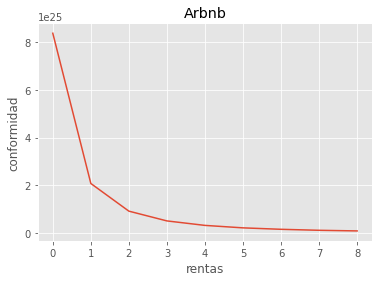

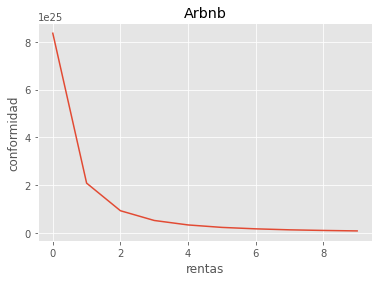

In [13]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i,
  init = 'k-means++', max_iter =300, n_init=10)
  kmeans.fit(Arbnb)
  wcss.append(kmeans.inertia_)
  plt.plot(range(i) , wcss )
  plt.title("Arbnb")
  plt.xlabel("rentas")
  plt.ylabel("conformidad")
  plt.show()

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan = DBSCAN(eps = 5 , min_samples =5)

In [16]:
labels = dbscan.fit_predict(Arbnb)

In [ ]:
np.unique(labels)

array([-1])

<function matplotlib.pyplot.show(*args, **kw)>

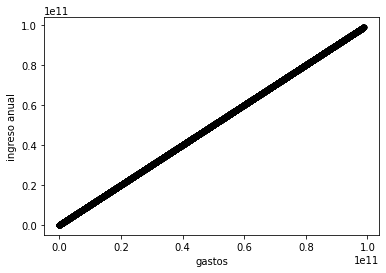

In [ ]:
plt.scatter(Arbnb.iloc[labels==-1],Arbnb[labels==-1],s=20,c="black")
plt.scatter(Arbnb.iloc[labels==0],Arbnb[labels==1],s=20,c="red")
plt.scatter(Arbnb.iloc[labels== -2],Arbnb[labels==2],s=20,c="blue")
plt.scatter(Arbnb.iloc[labels==-3],Arbnb[labels==-3],s=20,c="green")
plt.scatter(Arbnb.iloc[labels==4],Arbnb[labels==-3],s=20,c="black")
plt.xlabel("gastos")
plt.ylabel("ingreso anual")
plt.show

In [ ]:
#preparamos el modelo
#DATA ENGINEERING

In [17]:
y=Arbnb["minimum nights"]
x=Arbnb.drop("minimum nights", axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr_r2=metrics.r2_score(y_test, y_pred)
lr_MSE=metrics.mean_squared_error(y_test, y_pred)
lr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print("R^2 Score:", lr_r2)
print("MSE Score:", lr_MSE)
print("RMSE Score:", lr_RMSE)

R^2 Score: 0.006337302991299976
MSE Score: 1767.146665984396
RMSE Score: 42.037443618569334


In [ ]:
#los valores son muy malos , vamos a ver si podemos mejorarlo

In [ ]:
pred_graph_lr=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_lr

,True Values,Predicted Values
35236,1.0,4.986502
7701,5.0,9.677949
38966,3.0,6.973371
32665,5.0,3.956737
27816,1.0,7.025903
...,...,...
38612,2.0,7.187651
15152,1.0,8.077709
36423,5.0,8.023324
40036,1.0,6.560814


In [ ]:
pred_graph_xgb=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_xgb

,True Values,Predicted Values
35236,1.0,4.986502
7701,5.0,9.677949
38966,3.0,6.973371
32665,5.0,3.956737
27816,1.0,7.025903
...,...,...
38612,2.0,7.187651
15152,1.0,8.077709
36423,5.0,8.023324
40036,1.0,6.560814


In [ ]:
import plotly.express as px
from xgboost import XGBRegressor
fig=px.scatter(pred_graph_xgb, x="True Values", y="Predicted Values")
fig.show()

In [ ]:
# muchos datos nulos o archivos ruidosos hicieron un dataset con faltantes de datos para lo que se quiere llegar a resolver
#decidimos agregar otro dataset con la informacion faltante
#vemos que hay datos atipicos producto de precios elevados , entre otros

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train,y_train)
y_pred= gbr.predict(X_test)
gbr_r2=metrics.r2_score(y_test, y_pred)
gbr_MSE=metrics.mean_squared_error(y_test, y_pred)
gbr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print("R^2 Score:", gbr_r2)
print("MSE Score:", gbr_MSE)
print("RMSE Score:", gbr_RMSE)

R^2 Score: -0.09520803492399144
MSE Score: 1947.7366246126758
RMSE Score: 44.13316921106704


In [ ]:
pred_graph_gbr=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_gbr

,True Values,Predicted Values
35236,1.0,2.152507
7701,5.0,7.060720
38966,3.0,5.518848
32665,5.0,1.981151
27816,1.0,6.364653
...,...,...
38612,2.0,7.264625
15152,1.0,9.716157
36423,5.0,8.130805
40036,1.0,2.219499


In [ ]:
fig=px.scatter(pred_graph_gbr, x="True Values", y="Predicted Values")
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor()
ran.fit(X_train, y_train)
y_pred= ran.predict(X_test)
ran_r2=metrics.r2_score(y_test, y_pred)
ran_MSE=metrics.mean_squared_error(y_test, y_pred)
ran_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print("R^2 Score:", ran_r2)
print("MSE Score:", ran_MSE)
print("RMSE Score:", ran_RMSE)

R^2 Score: -0.15980428907677657
MSE Score: 2062.6157033028717
RMSE Score: 45.416029145037236


In [ ]:
pred_graph_ran=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_ran

,True Values,Predicted Values
35236,1.0,2.89
7701,5.0,21.40
38966,3.0,29.64
32665,5.0,2.54
27816,1.0,4.69
...,...,...
38612,2.0,5.98
15152,1.0,3.60
36423,5.0,6.76
40036,1.0,2.15


In [ ]:
fig=px.scatter(pred_graph_ran, x="True Values", y="Predicted Values")
fig.show()

In [ ]:
models={"LR":[lr_r2, lr_MSE , lr_RMSE],
       "XGB":[xgb_r2, xgb_MSE, xgb_RMSE],
       "GBR":[gbr_r2, gbr_MSE , gbr_RMSE],
       "RAN":[ran_r2, ran_MSE , ran_RMSE],}
models=pd.DataFrame(models)
models=models.rename(index={0:"R^2", 1:"MSE", 2:"RMSE"})

In [ ]:
models

,LR,XGB,GBR,RAN
R^2,0.006337,0.008897,-0.095208,-0.159804
MSE,1767.146666,1762.594491,1947.736625,2062.615703
RMSE,42.037444,41.983264,44.133169,45.416029


In [ ]:
# resultado

Text(0.5, 1.0, 'RAN')

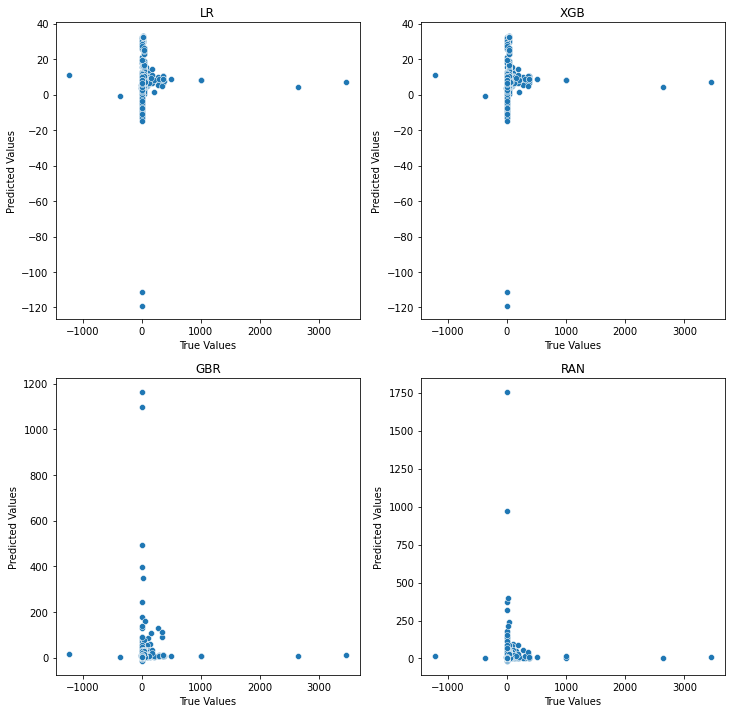

In [ ]:
fig , axes= plt.subplots(2, 2, figsize=(12,12))

sns.scatterplot(ax=axes[0,0], data=pred_graph_lr, x="True Values", 
                y="Predicted Values").set_title("LR")

sns.scatterplot(ax=axes[0,1], data=pred_graph_xgb, x="True Values",
                y="Predicted Values").set_title("XGB")

sns.scatterplot(ax=axes[1,0], data=pred_graph_gbr, x="True Values",
                y="Predicted Values").set_title("GBR")

sns.scatterplot(ax=axes[1,1], data=pred_graph_ran, x="True Values",
                y="Predicted Values").set_title("RAN")

In [ ]:
#validacion de metricas

In [20]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [21]:
# normalizar data
X = Arbnb.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
# diccionarios vacios para ser almacenados los resultados
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # Algoritmo K means
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(X,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(X,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(X,clusters) # Calculo del indice de Calinski-Harabasz

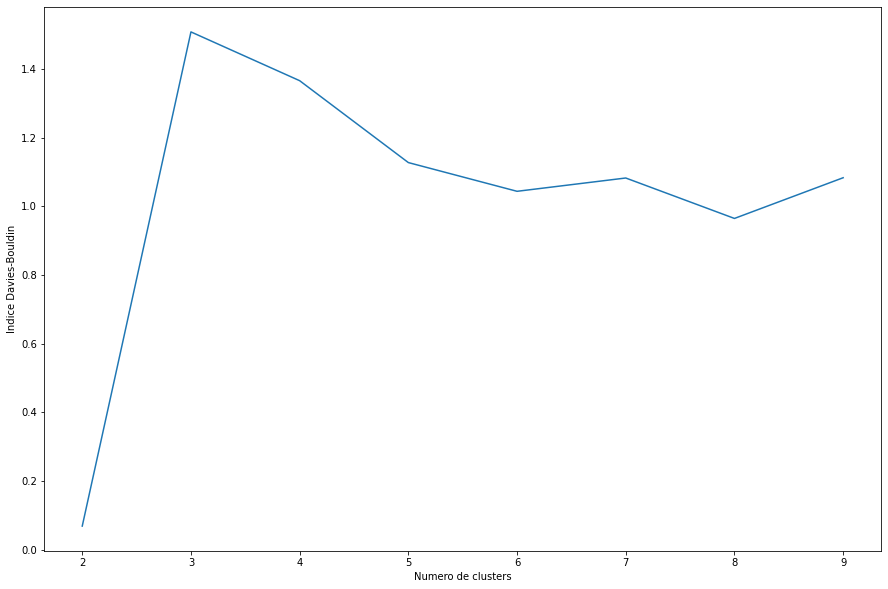

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Indice Davies-Bouldin")
plt.show()

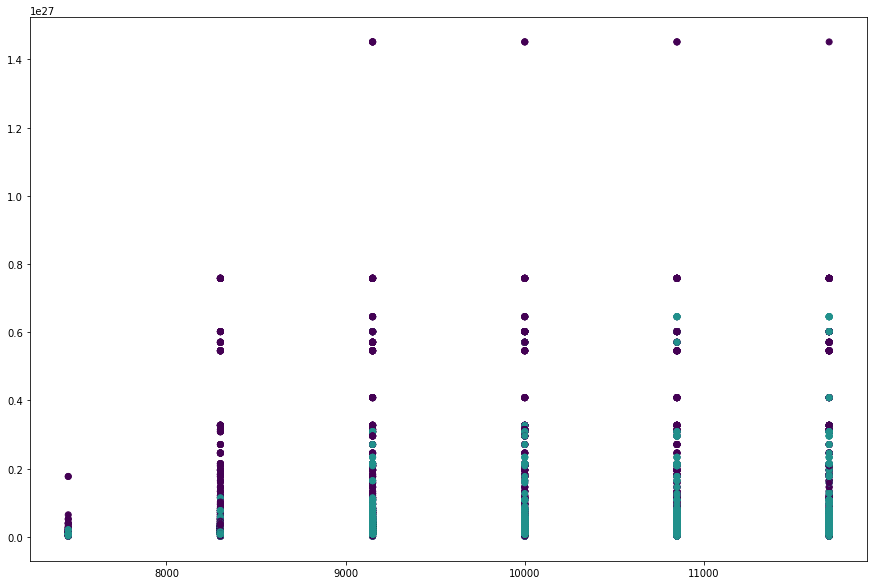

In [ ]:
# desnormalizar los datos
X = sc.inverse_transform(X)
plt.figure(figsize=(15,10))
plt.scatter(X[:,-3],X[:,-2],c=labels)
plt.show()

In [ ]:
X

array([[2.26349798e+141, 9.94317111e+219, 1.02669885e+002, ...,
        5.87227180e+003, 2.19874184e+023, 1.59823677e+045],
       [2.26541502e+141, 6.50354213e+219, 1.02669890e+002, ...,
        5.87227180e+003, 8.06676946e+022, 1.27535122e+045],
       [2.26609548e+141, 9.79588396e+219, 1.02669892e+002, ...,
        6.33223235e+003, 4.58660723e+022, 1.96565825e+045],
       ...,
       [4.81308524e+142, 9.39824061e+219, 1.02669892e+002, ...,
        6.33223235e+003, 4.58660723e+022, 2.84426606e+044],
       [4.81321003e+142, 6.48955005e+219, 1.02669890e+002, ...,
        5.41231124e+003, 4.58660723e+022, 6.07699567e+042],
       [4.81333481e+142, 1.51204230e+219, 1.02669886e+002, ...,
        4.03242957e+003, 1.10644500e+022, 6.07699567e+042]])

In [ ]:
# notamos que nos faltaban muchos mas especificos , es decir , datos como , si se podia fumar , el estado del lugar,
# si tenia rampas para discapacitados , en el caso de vehiculos electricos , seguridad del lugar , lavanderia , precio por estas cosas .
# Es por ello que dedicimos agregar datos utilizando un pequeño dataset de rentas - housing o "cama adentro" como se lo conoce en argentina , donde especifica
# Un poco mas todos estos aspectos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [19]:
train_df = pd.read_csv('Airbnb_Open_Data.csv')
test_df = pd.read_csv('Airbnb_Open_Data.csv')
sample_df = pd.read_csv('Airbnb_Open_Data.csv')
train_df.shape, test_df.shape, sample_df.shape

((102599, 26), (102599, 26), (102599, 26))

In [ ]:
print(f'There are {train_df.shape[0]} rows in train data.')
print(f'There are {test_df.shape[0]} rows in test data.')

print(f"There are {train_df['minimum nights'].nunique()} distinct nights in train data.")
print(f"There are {test_df['minimum nights'].nunique()} distinct nights in test data.")
print(f"There are {sample_df['price'].nunique()} unique .")
print(f"There are {train_df['price'].nunique()} unique types.")

There are 102599 rows in train data.
There are 102599 rows in test data.
There are 153 distinct nights in train data.
There are 153 distinct nights in test data.
There are 1151 unique .
There are 1151 unique types.


In [ ]:
train_df.fillna(10, inplace=True)
train_df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,10
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,10
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,10,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,10,10.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",10
3,1002755,10,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,10,10
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,10,10.00,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,10
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,10
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,10,10.00,5.0,1.0,342.0,10,10
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,10,10


In [ ]:
train_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [ ]:
train_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,10
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,10
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,10,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,10,10.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",10
3,1002755,10,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,10,10
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",10


In [ ]:
# analizamos los tipos de datos que tenemos para saber cual manipular

In [ ]:
[x for x in train_df.columns if x not in test_df.columns]

[]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102599 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102599 non-null  object 
 4   host name                       102599 non-null  object 
 5   neighbourhood group             102599 non-null  object 
 6   neighbourhood                   102599 non-null  object 
 7   lat                             102599 non-null  float64
 8   long                            102599 non-null  float64
 9   country                         102599 non-null  object 
 10  country code                    102599 non-null  object 
 11  instant_bookable                102599 non-null  object 
 12  cancellation_pol

In [ ]:
def get_num_cat_cols(df):
    
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)
    
    return num_cls, cat_cls

In [ ]:
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']
Categorical columns 
 ['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'price', 'service fee', 'last review', 'house_rules', 'license']


In [ ]:
train_df[num_cols].describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000
mean,2.914623e+07,4.925411e+10,40.725698,-73.943098,2008.310695,8.143276,27.452558,2.709044,3.300461,7.943021,140.560658
std,1.625751e+07,2.853900e+10,0.277017,0.742924,91.540896,30.493046,49.470282,3.508877,1.337225,32.168859,135.415326
min,1.001254e+06,1.236005e+08,10.000000,-74.249840,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688730,-73.982580,2007.000000,2.000000,1.000000,0.280000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,1.050000,3.000000,1.000000,95.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,3.340000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,10.000000,2022.000000,5645.000000,1024.000000,90.000000,10.000000,332.000000,3677.000000


In [ ]:
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(train_df[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - NAME
----------------------------------------------------------------------------------------------------
10                                                250
Home away from home                                33
Water View King Bed Hotel Room                     30
Hillside Hotel                                     30
Brooklyn Apartment                                 27
                                                 ... 
♂ ♀ Sunny Bedroom in Popular Brooklyn               1
♂ ♀ Large Room Close to Express Subway + Bus        1
Clean room in Soho/Nolita                           1
♂ ♀ Large Sunny Bedroom Walk to Express Subway      1
Parisian Style Apartment in Heart of Brooklyn       1
Name: NAME, Length: 61282, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - host_identity_verified
-------

In [ ]:
cat_cols = cat_cols + [x for x in num_cols if '_Score' in x]
print(cat_cols)
num_cols = [x for x in num_cols if x not in cat_cols]
print(num_cols)

['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'price', 'service fee', 'last review', 'house_rules', 'license']
['id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


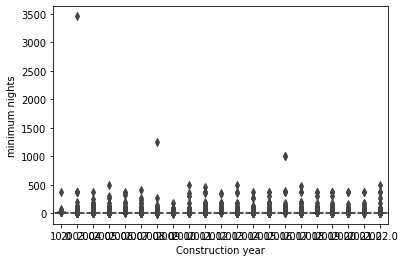

In [ ]:
sns.boxplot(x = train_df['Construction year'], y = train_df['minimum nights'])

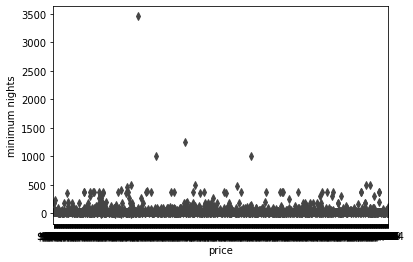

In [ ]:
sns.boxplot(x = train_df['price'], y = train_df['minimum nights'])

In [ ]:
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [ ]:
def cat_col_test(df, cat_colname, target_colname):
    
    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

In [ ]:
for c in cat_cols:
    cat_col_test(train_df, c, 'price')

Column name - NAME
p value is 0.5201977962707794
Both variables are Independent (H0 holds true)


In [ ]:
train_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [ ]:
train_df['price'] = np.where(train_df['price'] == 'yes',1,0)
test_df['price'] = np.where(test_df['price'] == 'yes',1,0)

train_df['minimum nights'] = np.where(train_df['minimum nights'] == 'yes',1,0)
test_df['minimum nights'] = np.where(test_df['minimum nights'] == 'yes',1,0)

In [ ]:
dict_ethnicity = dict(zip(train_df['price'].value_counts().index, range(1,train_df['price'].nunique()+1)))
dict_ethnicity

{0: 1}

In [ ]:
col_name = 'minimum nights'
dict_country = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_country)
test_df[col_name] = test_df[col_name].map(dict_country)

In [ ]:
col_name = 'availability 365'
dict_relation = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_relation)
test_df[col_name] = test_df[col_name].map(dict_relation)

In [ ]:
train_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,785,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,1,9.0,10/19/2021,0.21,4.0,6.0,288,Clean up and treat the home the way you'd like...,10
1,85033,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,1,45.0,5/21/2022,0.38,4.0,2.0,316,Pet friendly but please confirm with me if the...,10
2,68167,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,10,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,1,0.0,10,10.00,5.0,1.0,119,"I encourage you to use my kitchen, cooking and...",10
3,68166,10,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,1,270.0,7/5/2019,4.64,4.0,1.0,153,10,10
4,68165,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,1,9.0,11/19/2018,0.10,3.0,1.0,321,"Please no smoking in the house, porch or on th...",10


In [ ]:
test_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,1,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,1,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,1,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,1,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,1,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
train_df.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

In [ ]:
test_df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                  0
service fee                          273
minimum nights                         0
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
test_df['price'].fillna(1.0,inplace=True)

In [12]:
X = train_df.drop(['id','minimum nights'],axis=1)
y = train_df['availability 365']

X.shape, y.shape

((102599, 24), (102599,))

In [ ]:
#iniciamos el mejoramiento de modelo

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
seed = 123
model1 = LogisticRegression(max_iter = 500)
model2 = SVC(random_state = seed)
model3 = GaussianNB()
model4 = MLPClassifier(random_state = seed,max_iter=500)
model5 = SGDClassifier(random_state = seed)
model6 = KNeighborsClassifier()
model7 = DecisionTreeClassifier(random_state = seed)
model8 = RandomForestClassifier(random_state = seed,class_weight="balanced")
model9 = GradientBoostingClassifier(random_state = seed)
model10 = LGBMClassifier(random_state = seed)
model11 = XGBClassifier(random_state = seed,use_label_encoder=False)

In [ ]:
from sklearn.model_selection import cross_val_score

models = [model1,model2,model3,model4,model5,model6,model7,
          model8,model9,model10,model11]


for m in range(len(models)):
    model = models[m]
    scores = cross_val_score(model, X, y, scoring = 'roc_auc', cv = 5)
    print(f"For no of trees {m+1} - {np.mean(scores)}")

For no of trees 1 - nan
For no of trees 2 - nan
For no of trees 3 - nan
For no of trees 4 - nan
For no of trees 5 - nan
For no of trees 6 - nan
For no of trees 7 - nan
For no of trees 8 - nan
For no of trees 9 - nan
For no of trees 10 - nan
For no of trees 11 - nan


In [15]:
test_df.drop(['host name','neighbourhood','neighbourhood group','price','NAME','host_identity_verified','country','country code',
            'instant_bookable','cancellation_policy','room type','service fee','last review','license','house_rules'], axis = 'columns', inplace=True)

In [21]:
train_df.drop(['host name','neighbourhood','neighbourhood group','price','NAME','host_identity_verified','country','country code',
            'instant_bookable','cancellation_policy','room type','service fee','last review','license','house_rules'], axis = 'columns', inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle = True)

X1 = np.array(X)
y1 = np.array(y)
scores = []

for i, (train_index, test_index) in enumerate(skf.split(X1, y1)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X1[train_index], X1[test_index]
    y_train, y_valid = y1[train_index], y1[test_index]
    
    model1 = LogisticRegression(max_iter = 1000, C=1.0,penalty='l2',solver='newton-cg')
    model1.fit(X_train,y_train)
    y_pred1 = pd.DataFrame(model1.predict_proba(X_valid))[1].values
    
    model2 = RandomForestClassifier(random_state=123,class_weight="balanced")
    model2.fit(X_train,y_train)
    y_pred2 = pd.DataFrame(model2.predict_proba(X_valid))[1].values
    
    model3 = GaussianNB()
    model3.fit(X_train,y_train)
    y_pred3 = pd.DataFrame(model3.predict_proba(X_valid))[1].values
    
    y_pred = 0.2 * y_pred1 + 0.15 * y_pred2 + 0.65*y_pred3
    score = roc_auc_score(y_valid, y_pred)
    y_pred_label = np.where(y_pred<0.5,0,1)
    #print(classification_report(y_valid,y_pred_label))
    scores.append(score)
    
    print(f'Fold {i + 1}/{kfold} - Score: {score}')   

print(f"Avg scores - {np.mean(scores)}")

[Fold 1/5]


In [ ]:
x_test = np.array(test_df.drop('id',axis=1))
y_pred_test1 = pd.DataFrame(model1.predict_proba(x_test))[1].values
y_pred_test2 = pd.DataFrame(model2.predict_proba(x_test))[1].values
y_pred_test3 = pd.DataFrame(model3.predict_proba(x_test))[1].values
y_pred_final = 0.2 * y_pred_test1 + 0.15 * y_pred_test2 + 0.65 * y_pred_test3

In [ ]:
submission = pd.DataFrame({'id':test_df['minimum_nights'],
                           'availability 365':y_pred_final})
submission.head()

In [ ]:
!pip install scikit-learn -U

In [23]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Make sure to drop the ids and target
train = train_df.drop(columns = ['id', 'minimum nights'])
test = test_df.drop(columns = ['number of reviews'])

# Make a pipeline with imputation and pca
pipeline = Pipeline(steps = [('SimpleImputer', SimpleImputer(strategy = 'median')),
             ('pca', PCA())])

# Fit and transform on the training data
train_pca = pipeline.fit_transform(train)



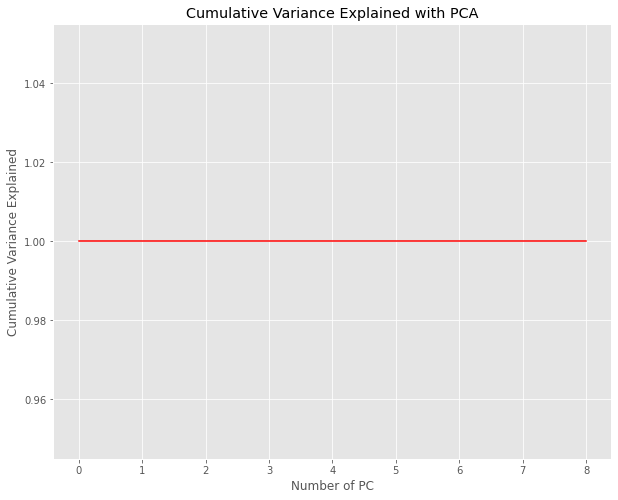

In [24]:
# Extract the pca object
pca = pipeline.named_steps['pca']

# Plot the cumulative variance explained

plt.figure(figsize = (10, 8))
plt.plot(list(range(train.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

In [37]:
print('2 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:2])))

2 principal components account for 100.0000% of the variance.
